# "Lesson 2: Backtest your trading strategy with only 3 lines of code"
> "Learn how to assess the performance of an SMAC strategy on JFC"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Lorenzo Ampil
- categories: [strategies, lesson]

In [1]:
# !pip install fastquant


# fastquant Lesson 2 - Backtest your trading strategy with only 3 lines of code

# fastquant package Updates

1. `get_stock_data` has been added, which now includes all Yahoo Finance data (on top of PSE)
2. `backtest` function is now ready to use!
3. README has been updated to reflect the above

# Setup
1. Google Colab (limitted plotting)
2. Jupyter notebook (complete plotting)

## Google Colab Lesson 2 link

Colab notebook on this [link](https://colab.research.google.com/drive/1FxxY5kDdpgKFkGd7Br6PClu3uC-JWuPH)

## How to use Jupyter notebooks
#### 1. Go to your terminal and install jupyter

`pip3 install jupyter`

#### 2. Clone fastquant

`git clone https://github.com/enzoampil/fastquant.git`

`cd fastquant`

#### 3. Run jupyter

`jupyter notebook`
#### 4. Open lesson at `lessons/fastquant_lesson2_backtest_your_trading_strategy.ipynb`


# Recap from Lesson 1

## Plot Closing Stock Prices


Using matplotlib backend: MacOSX
MacOSX
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JFC: Data doesn't exist for startDate = 1514761200, endDate = 1546297200


Text(0.5, 1.0, 'Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01')

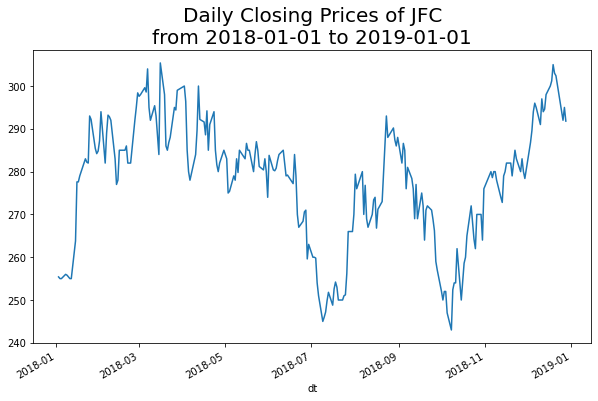

In [2]:
%matplotlib
from matplotlib import pyplot as plt
from fastquant import backtest, get_stock_data

import matplotlib
print(matplotlib.get_backend())
matplotlib.use('Agg')

%matplotlib inline
jfc = get_stock_data("JFC", "2018-01-01", "2019-01-01")
jfc.close.plot(figsize=(10, 6))
plt.title("Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

## Analyze with a simple moving average (SMA) trading strategy

In this section, we will attempt to visually assess the performance of a SMA crossover strategy. There are many ways to do this strategy, but we will go with a “price crossover” approach with a 30 day SMA.

In this case, it’s considered a “buy” signal when the closing price crosses the simple moving average from below, and considered a “sell” signal when the closing price crosses the simple moving average from above.

So how do we know our SMA price crossover strategy is effective? Visually, we can assess this by seeing if the “sell” signal happens right before the stock price starts going down, and if the “buy” signal happens right before the stock price starts going up.

Text(0.5, 1.0, 'Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01')

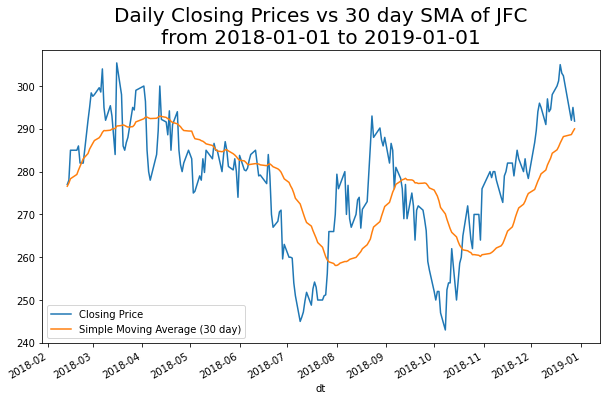

In [3]:
import pandas as pd

ma30 = jfc.close.rolling(30).mean()
close_ma30 = pd.concat([jfc.close, ma30], axis=1).dropna()
close_ma30.columns = ['Closing Price', 'Simple Moving Average (30 day)']

close_ma30.plot(figsize=(10, 6))
plt.title("Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

# Lesson 2: Backtesting with fastquant

## Backtest your trading strategy in 3 lines of code

Now, let's get started with backtesting!

Below, I show how you can use `fastquant` to backtest a simple moving average crossover (similar to what we have above).

The three steps are:
1. Import the `backtest` and `get_pse_data` functions from `fastquant`

In [4]:
from fastquant import backtest, get_stock_data

2. Get stock data in a date, close, volume format (DCV)

Here, we get DCV (date, closing, volume) data from JFC using the `get_pse_data` function

In [5]:
jfc = get_stock_data("JFC", "2018-01-01", "2019-01-01")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JFC: Data doesn't exist for startDate = 1514761200, endDate = 1546297200


In [6]:
jfc

,close
dt,
2018-01-03,255.4
2018-01-04,255.0
2018-01-05,255.0
2018-01-08,256.0
2018-01-09,255.8
...,...
2018-12-20,303.0
2018-12-21,302.4
2018-12-26,292.0


3. Backtest a simple moving average crossover (`smac`) strategy on the JFC data

We perform the backtest using a 15 day moving average as the "fast" moving average, and a 35 day moving average as the "slow" moving average. If we want to change these parameter values, we can just replace the numbers in the `backtest` function.

We call these the *strategy level arguments* since they are unique to a specific strategy.

Do note that by default, the backtesting algorithm assumes that you start out with PHP 100,000 as cash (`init_cash`), while using all of that cash during a buy signal (`buy_prop`), and selling all of your current stock holdings during a sell signal (`sell_prop`). We call these the *global level arguments* since they can be shared across companies.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
2018-12-28, ===Global level arguments===
2018-12-28, init_cash : 100000
2018-12-28, buy_prop : 1
2018-12-28, sell_prop : 1
2018-12-28, commission : 0
2018-12-28, stop_loss : 0
2018-12-28, stop_trail : 0
2018-12-28, take_profit : 0
===Strategy level arguments===
fast_period : 15
slow_period : 35
2018-12-28, Final Portfolio Value: 102697.8
2018-12-28, Final PnL: 2697.8
Time used (seconds): 0.11500120162963867
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:15	slow_period:35
Returns	rtot:0.0266205091006167	ravg:0.00010954942016714692	rnorm

<IPython.core.display.Javascript object>


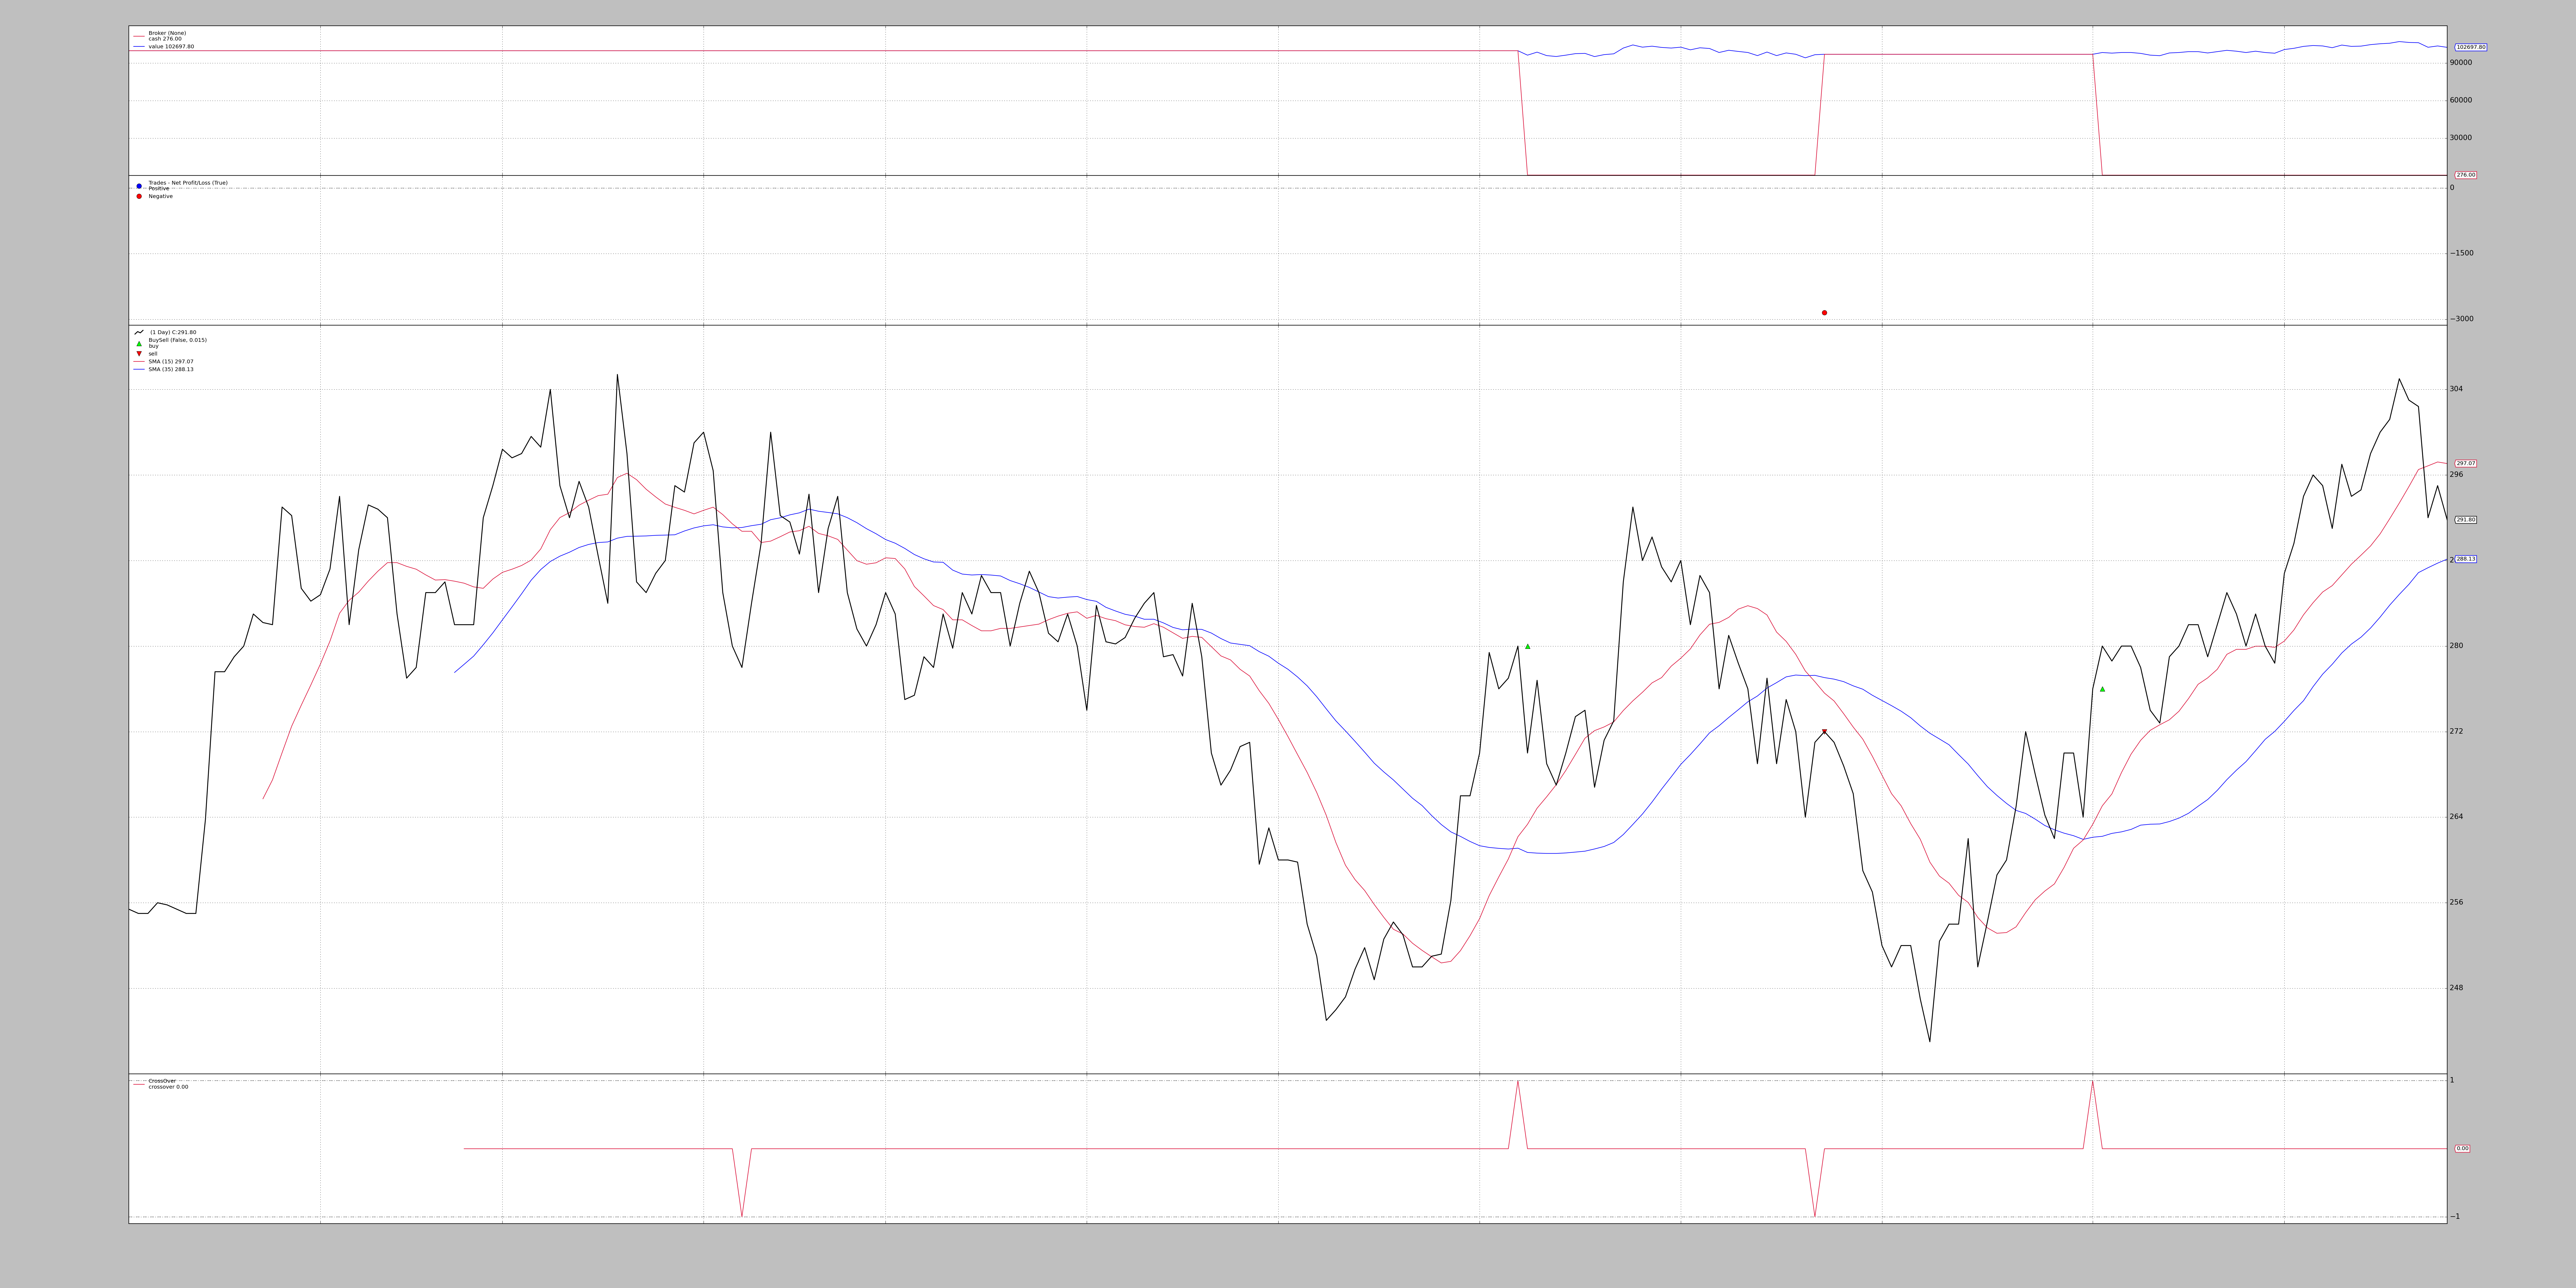

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,0,1,0.0,0.0,-2848.0,-2.848,0.0,0.0,-2848.0,-2.848


In [11]:
%matplotlib
backtest('smac', jfc, fast_period=15, slow_period=35)

## Customize strategy parameters

The idea of backtesting is that we should choose the **best** strategy based on which one has worked best over time.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
2018-12-28, ===Global level arguments===
2018-12-28, init_cash : 100000
2018-12-28, buy_prop : 1
2018-12-28, sell_prop : 1
2018-12-28, commission : 0
2018-12-28, stop_loss : 0
2018-12-28, stop_trail : 0
2018-12-28, take_profit : 0
===Strategy level arguments===
fast_period : 1
slow_period : 30
2018-12-28, Final Portfolio Value: 79582.59999999999
2018-12-28, Final PnL: -20417.4
Time used (seconds): 0.13309812545776367
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:1	slow_period:30
Returns	rtot:-0.22837470999750262	ravg:-0.00093981362138

<IPython.core.display.Javascript object>


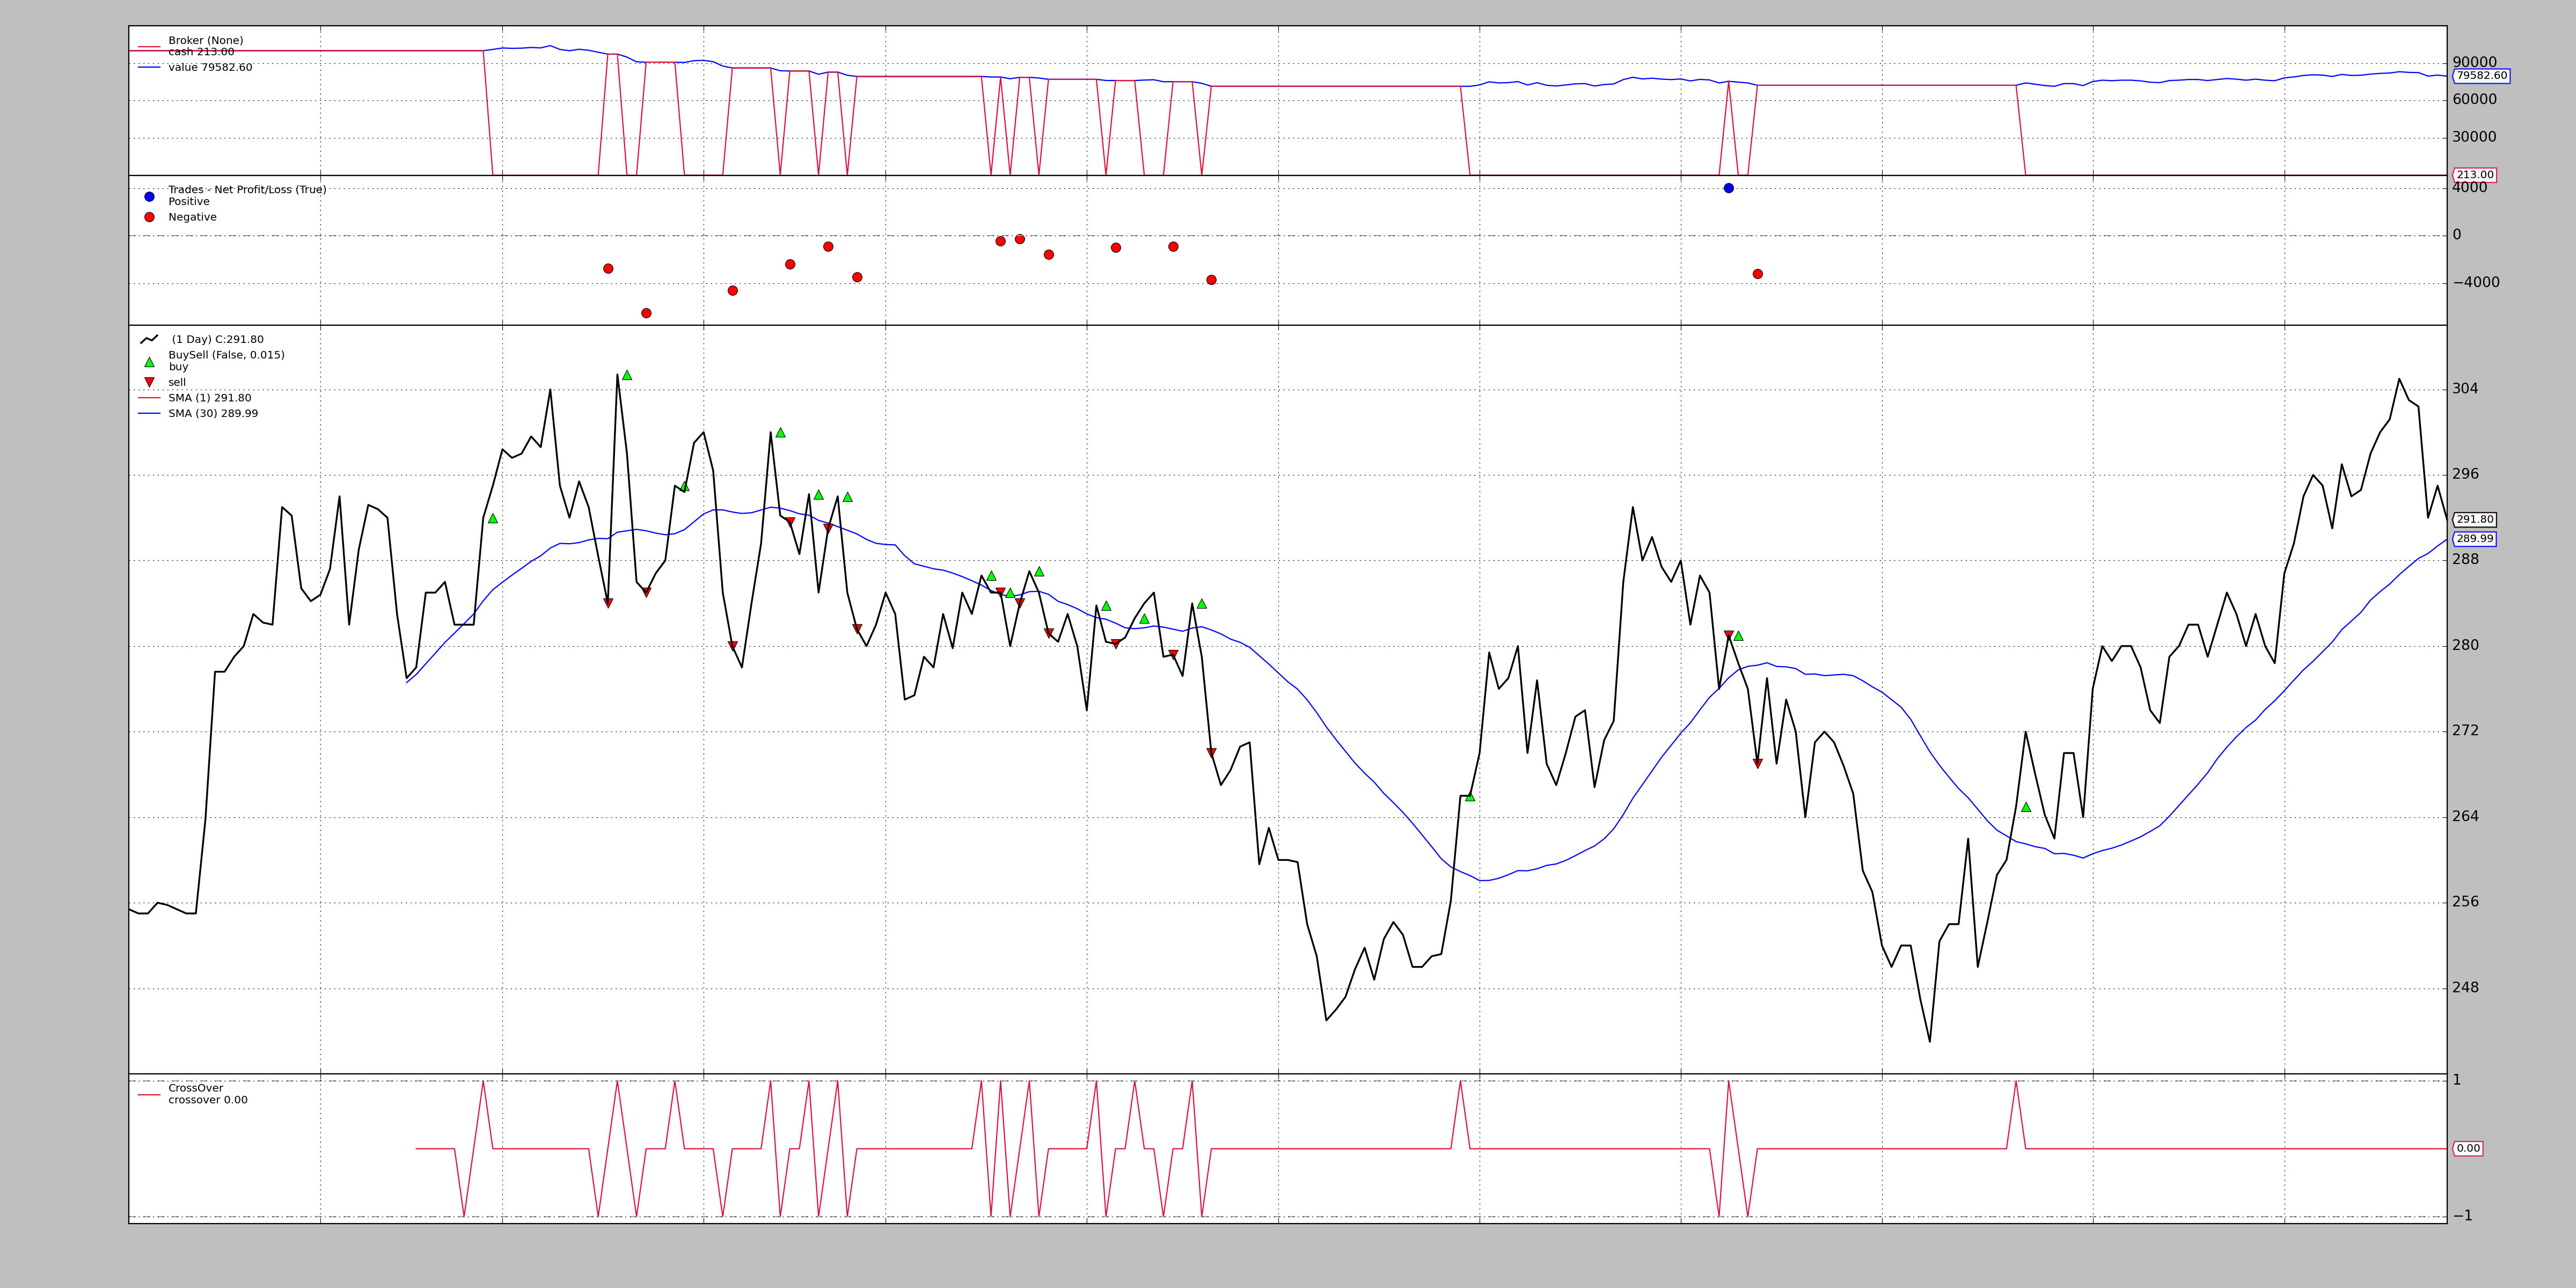

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,1,13,4020.0,4.02,-2440.538462,-2.440538,4020.0,4.02,-6487.2,-6.4872


In [12]:
%matplotlib
backtest('smac', jfc, fast_period=1, slow_period=30)

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
2018-12-28, ===Global level arguments===
2018-12-28, init_cash : 100000
2018-12-28, buy_prop : 1
2018-12-28, sell_prop : 1
2018-12-28, commission : 0
2018-12-28, stop_loss : 0
2018-12-28, stop_trail : 0
2018-12-28, take_profit : 0
===Strategy level arguments===
fast_period : 30
slow_period : 50
2018-12-28, Final Portfolio Value: 85881.2
2018-12-28, Final PnL: -14118.8
Time used (seconds): 0.0994420051574707
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:30	slow_period:50
Returns	rtot:-0.15220524008957106	ravg:-0.0006263590127142842	rno

<IPython.core.display.Javascript object>


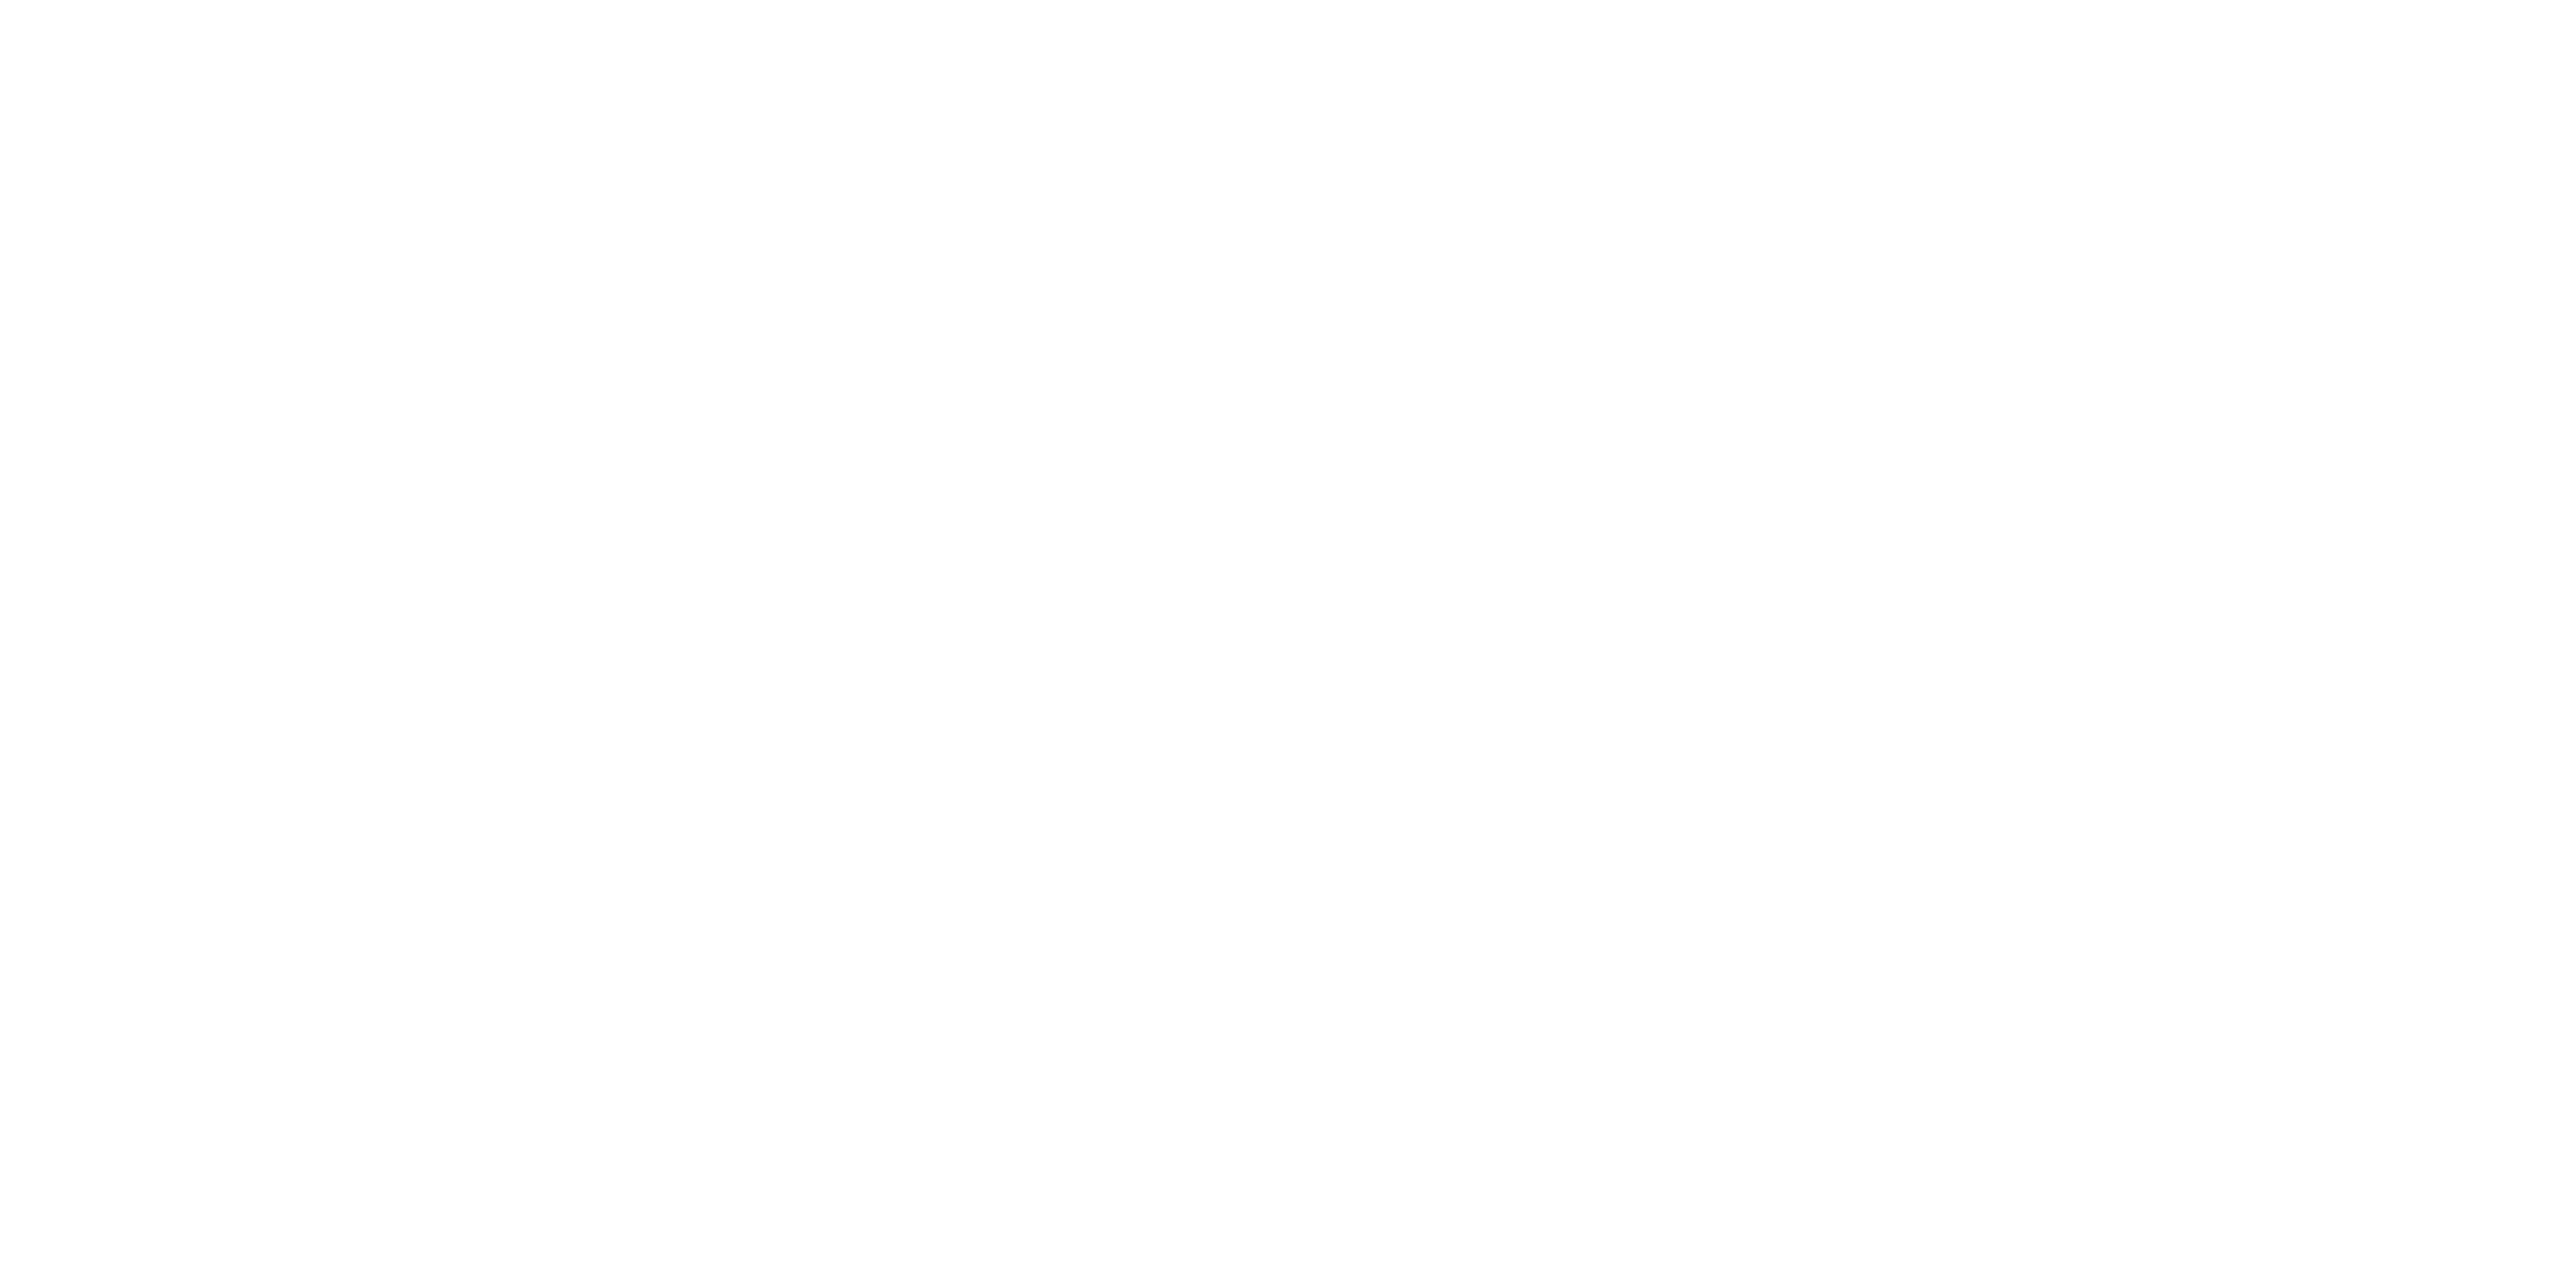

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,0,1,0.0,0.0,-17000.0,-17.0,0.0,0.0,-17000.0,-17.0


In [9]:
%matplotlib
backtest('smac', jfc, fast_period=30, slow_period=50)

 We can conclude that across all the parameter combinations we've tried, the best performing one is the one where `fast_period` = 15, while `slow_period` = 40.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
2018-12-28, ===Global level arguments===
2018-12-28, init_cash : 100000
2018-12-28, buy_prop : 1
2018-12-28, sell_prop : 1
2018-12-28, commission : 0
2018-12-28, stop_loss : 0
2018-12-28, stop_trail : 0
2018-12-28, take_profit : 0
===Strategy level arguments===
fast_period : 15
slow_period : 40
2018-12-28, Final Portfolio Value: 104594.40000000001
2018-12-28, Final PnL: 4594.4
Time used (seconds): 0.1852419376373291
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast_period:15	slow_period:40
Returns	rtot:0.044919826924664716	ravg:0.000184855254834

<IPython.core.display.Javascript object>


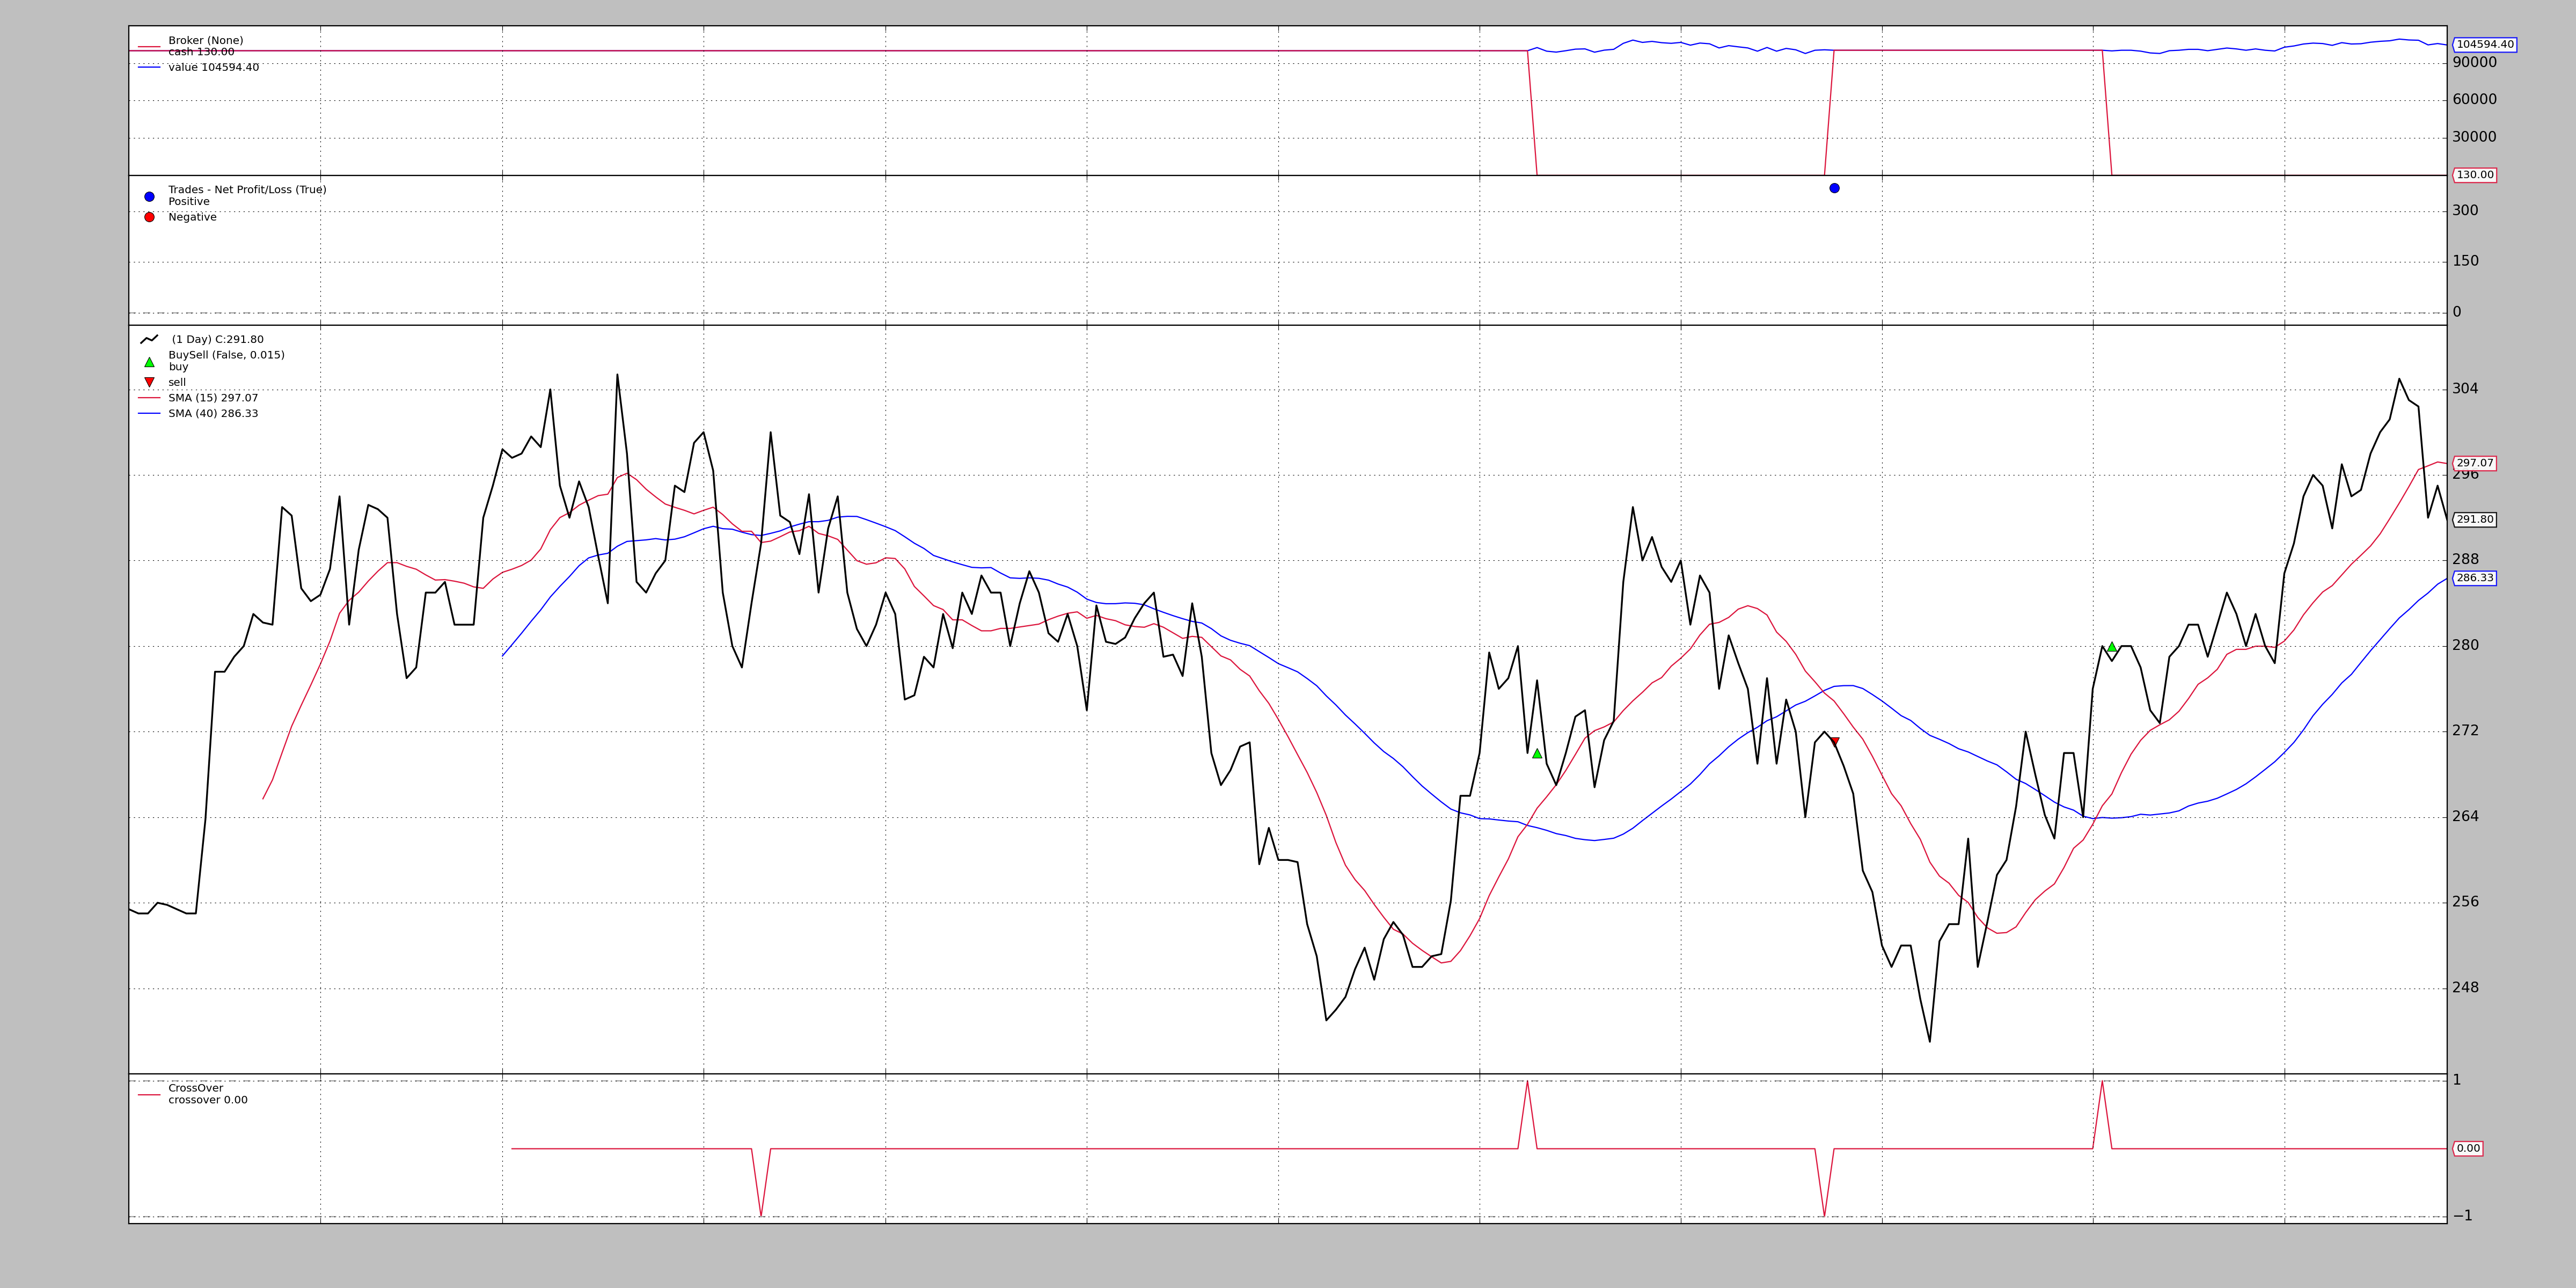

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,1,0,370.0,0.37,0.0,0.0,370.0,0.37,0.0,0.0


In [10]:
%matplotlib
backtest('smac', jfc, fast_period=15, slow_period=40)

## Relevant resources
1. Medium article
2. [Backtrader repo](https://github.com/mementum/backtrader)

## How to contribute more trading strategies

#### Checkout `fastquant/strategies.py`

1. New strategies can be added with as little as 20 lines of code (excluding docs)
2. Please let me know if you're intrested in contributing! :)
3. Happy to walk you through the process personally, still in the process of writing a tutorial

#### Planning to add the following TA strategies next:
1. SMAC [DONE]
2. RSI [DONE]
3. Bollinger Bands
4. Moving Average Convergence Divergence
5. EMAC (exponential moving average crossover)
6. On-Balance-Volume
7. Ichimoku Kinko Hyo
8. Average Directional Index
9. Parabolic Stop and Reverse (SAR)
10. Stochastic

#### For advanced DS peeps who want to go straight into ML based indicators, I also encourage you to contribute!

## Next webinar - Lecture 3: Relative Strength Index (Theory + backtesting)